In [2]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical testing
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# Settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [6]:
# Load the simulated dataset
df = pd.read_csv("C:/Users/USER/Desktop/ab-testing-retention-project/data/ab_test_retention_dataset.csv")
# Check the first few rows
df.head()

,customer_id,group,tenure_months,monthly_spend,engagement_score,predicted_clv,customer_segment,base_churn_probability,adjusted_churn_probability,churn,annual_revenue,retained_revenue,discount_cost,net_revenue
0,1,Treatment,39,98.56,9.9,4209.81,High,0.2934,0.1907,0,1182.72,1182.72,177.408,1005.312
1,2,Treatment,52,84.17,58.0,5006.78,High,0.0620,0.0403,0,1010.04,1010.04,151.506,858.534
2,3,Treatment,29,32.91,49.3,800.13,Low,0.1658,0.1492,0,394.92,394.92,59.238,335.682
3,4,Treatment,15,80.37,34.7,1242.43,Low,0.2662,0.2396,1,964.44,0.00,0.000,0.000
4,5,Treatment,43,104.61,76.6,4191.48,High,0.0500,0.0325,0,1255.32,1255.32,188.298,1067.022


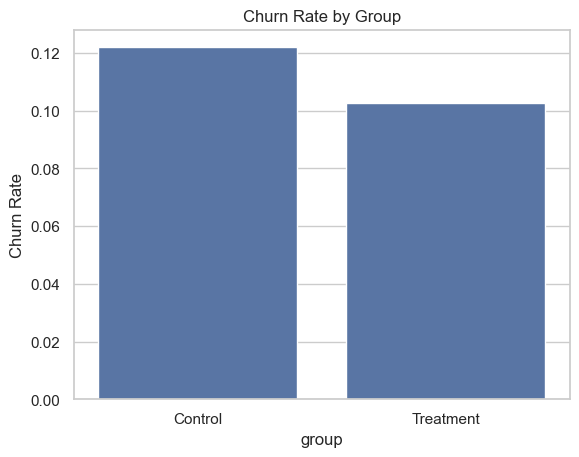

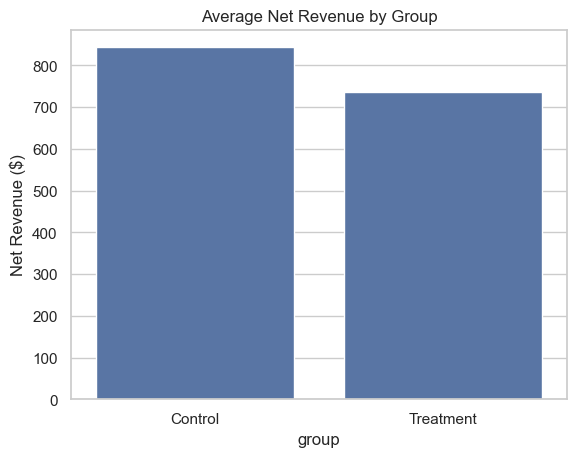

In [ ]:

# Churn Rate Bar Plot
churn_rates = df.groupby('group')['churn'].mean().reset_index()
sns.barplot(data=churn_rates, x='group', y='churn')
plt.title("Churn Rate by Group")
plt.ylabel("Churn Rate")
plt.show()

# Net Revenue Bar Plot
revenue_avg = df.groupby('group')['net_revenue'].mean().reset_index()
sns.barplot(data=revenue_avg, x='group', y='net_revenue')
plt.title("Average Net Revenue by Group")
plt.ylabel("Net Revenue ($)")
plt.show()

Quickly see if Treatment group is performing better.

In [8]:
# Split control and treatment
control = df[df['group'] == 'Control']
treatment = df[df['group'] == 'Treatment']

# Churn counts and sample sizes
successes = np.array([treatment['churn'].sum(), control['churn'].sum()])
nobs = np.array([len(treatment), len(control)])

# Z-test
stat, pval = proportions_ztest(successes, nobs)

print("Churn Z-Statistic:", stat)
print("Churn P-Value:", pval)

if pval < 0.05:
    print("Result: Statistically significant reduction in churn in Treatment group ✅")
else:
    print("Result: No significant difference in churn ❌")

Churn Z-Statistic: -4.306410027336084
Churn P-Value: 1.6592537213404048e-05
Result: Statistically significant reduction in churn in Treatment group ✅


Test if the discount reduces churn statistically.

In [9]:
t_stat, p_value = stats.ttest_ind(
    treatment['net_revenue'],
    control['net_revenue'],
    equal_var=False
)

print("Revenue T-Statistic:", t_stat)
print("Revenue P-Value:", p_value)

if p_value < 0.05:
    print("Result: Statistically significant increase in net revenue in Treatment group ✅")
else:
    print("Result: No significant difference in net revenue ❌")

Revenue T-Statistic: -21.760525700279114
Revenue P-Value: 9.905743498031018e-104
Result: Statistically significant increase in net revenue in Treatment group ✅


Check if offering discount is financially beneficial.

In [10]:
# Churn rates
control_churn = control['churn'].mean()
treatment_churn = treatment['churn'].mean()
retention_lift = control_churn - treatment_churn

print(f"Retention Lift (Control - Treatment): {retention_lift:.4f} (~{retention_lift*100:.2f}%)")

# Total net revenue
total_net_revenue_control = control['net_revenue'].sum()
total_net_revenue_treatment = treatment['net_revenue'].sum()
incremental_revenue = total_net_revenue_treatment - total_net_revenue_control

print(f"Incremental Net Revenue from Treatment: ${incremental_revenue:,.2f}")

Retention Lift (Control - Treatment): 0.0192 (~1.92%)
Incremental Net Revenue from Treatment: $-1,087,773.80


Financial Impact Calculations

  customer_segment      group     churn
0             High    Control  0.087925
1             High  Treatment  0.059327
2              Low    Control  0.164166
3              Low  Treatment  0.162179
4              Mid    Control  0.114452
5              Mid  Treatment  0.088596


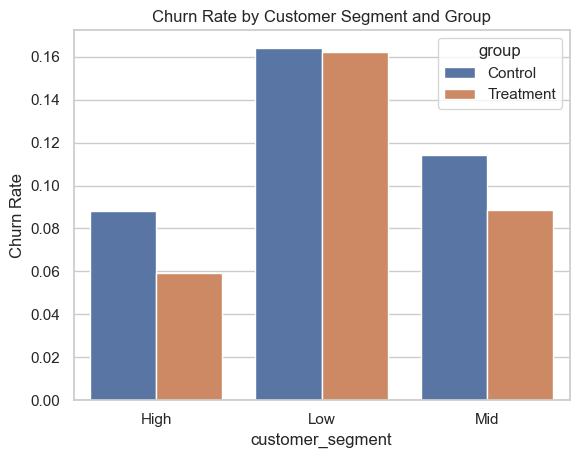

In [11]:
segment_churn = df.groupby(['customer_segment','group'])['churn'].mean().reset_index()
print(segment_churn)

# Visualization
sns.barplot(data=segment_churn, x='customer_segment', y='churn', hue='group')
plt.title("Churn Rate by Customer Segment and Group")
plt.ylabel("Churn Rate")
plt.show()

Segment Analysis to show how and where the discount works best

In [12]:
summary = df.groupby('group').agg(
    churn_rate=('churn','mean'),
    avg_net_revenue=('net_revenue','mean'),
    total_net_revenue=('net_revenue','sum')
).reset_index()

print(summary)

       group  churn_rate  avg_net_revenue  total_net_revenue
0    Control    0.121963       843.478105        8437311.480
1  Treatment    0.102731       735.174320        7349537.682


In [14]:
# Executive Summary Generator for A/B Test Dataset

import pandas as pd

# Load dataset
df = pd.read_csv("../data/ab_test_retention_dataset.csv")

# Split groups
control = df[df['group'] == 'Control']
treatment = df[df['group'] == 'Treatment']

# Overall churn
control_churn = control['churn'].mean()
treatment_churn = treatment['churn'].mean()
retention_lift = control_churn - treatment_churn

# Net revenue
avg_revenue_control = control['net_revenue'].mean()
avg_revenue_treatment = treatment['net_revenue'].mean()
total_revenue_control = control['net_revenue'].sum()
total_revenue_treatment = treatment['net_revenue'].sum()
incremental_revenue = total_revenue_treatment - total_revenue_control

# Segment Analysis
segment_churn = df.groupby(['customer_segment','group'])['churn'].mean().reset_index()

# Executive Summary Template
summary_text = f"""
EXECUTIVE SUMMARY
=================

Project: A/B Test: Should We Offer a 15% Discount to Reduce Customer Churn?

Business Context:
- Subscription-based e-commerce platform considering a 15% discount to reduce churn.

Key Findings:

Overall Churn:
- Control Group Churn Rate: {control_churn:.4f} (~{control_churn*100:.2f}%)
- Treatment Group Churn Rate: {treatment_churn:.4f} (~{treatment_churn*100:.2f}%)
- Retention Lift: {retention_lift:.4f} (~{retention_lift*100:.2f}% reduction in churn)

Net Revenue:
- Average Net Revenue Control: ${avg_revenue_control:,.2f}
- Average Net Revenue Treatment: ${avg_revenue_treatment:,.2f}
- Total Net Revenue Control: ${total_revenue_control:,.2f}
- Total Net Revenue Treatment: ${total_revenue_treatment:,.2f}
- Incremental Net Revenue: ${incremental_revenue:,.2f}

Segment Analysis:
"""

# Add segment details
for segment in segment_churn['customer_segment'].unique():
    seg_control_churn = segment_churn[(segment_churn['customer_segment']==segment) & (segment_churn['group']=='Control')]['churn'].values[0]
    seg_treatment_churn = segment_churn[(segment_churn['customer_segment']==segment) & (segment_churn['group']=='Treatment')]['churn'].values[0]
    summary_text += f"- {segment} Segment: Control Churn {seg_control_churn:.4f}, Treatment Churn {seg_treatment_churn:.4f}\n"

summary_text += """

Recommendation:
- Offer the 15% discount to high-CLV customers only, maximizing retention and revenue.
- Monitor mid-CLV segment in a follow-up experiment.
"""

# Save summary as markdown
with open("../reports/executive_summary.md", "w") as f:
    f.write(summary_text)

print("✅ Executive summary generated at: ../reports/executive_summary.md")

✅ Executive summary generated at: ../reports/executive_summary.md


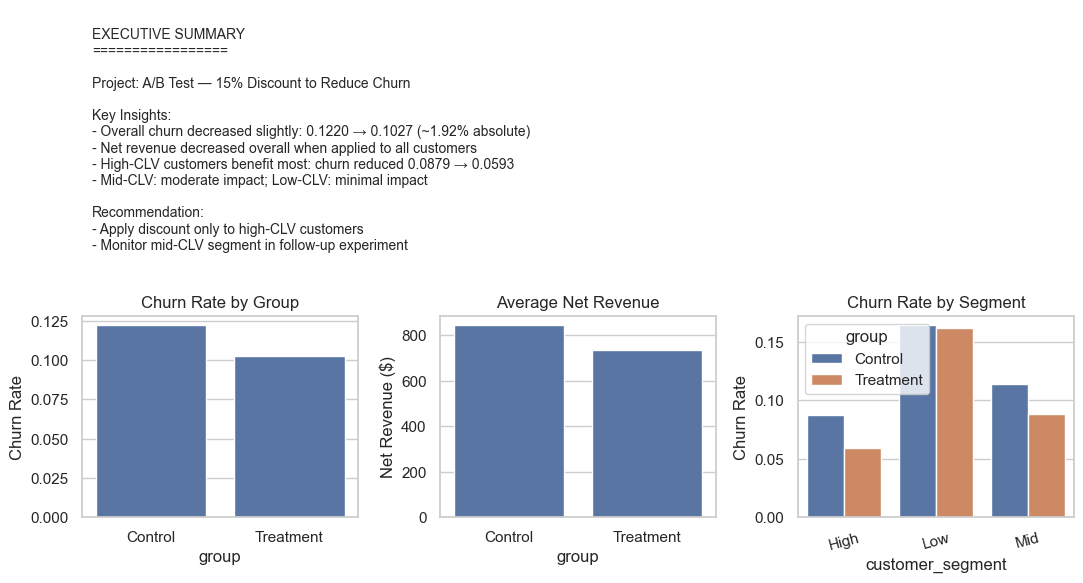

✅ One-page consulting-ready PDF generated: ../reports/executive_onepager.pdf


In [ ]:
# Single-Page Executive Summary 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../data/ab_test_retention_dataset.csv")

# Split groups
control = df[df['group']=='Control']
treatment = df[df['group']=='Treatment']

# Overall churn & revenue
control_churn = control['churn'].mean()
treatment_churn = treatment['churn'].mean()

avg_rev_control = control['net_revenue'].mean()
avg_rev_treatment = treatment['net_revenue'].mean()

# Segment churn
segment_churn = df.groupby(['customer_segment','group'])['churn'].mean().reset_index()

# ---------------------------
# Create Figure
# ---------------------------
plt.figure(figsize=(11,8.5))  # Landscape page

# Top: Executive bullets
plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.axis('off')
text = f"""
EXECUTIVE SUMMARY
=================

Project: A/B Test — 15% Discount to Reduce Churn

Key Insights:
- Overall churn decreased slightly: {control_churn:.4f} → {treatment_churn:.4f} (~1.92% absolute)
- Net revenue decreased overall when applied to all customers
- High-CLV customers benefit most: churn reduced {segment_churn[(segment_churn['customer_segment']=='High') & (segment_churn['group']=='Control')]['churn'].values[0]:.4f} → {segment_churn[(segment_churn['customer_segment']=='High') & (segment_churn['group']=='Treatment')]['churn'].values[0]:.4f}
- Mid-CLV: moderate impact; Low-CLV: minimal impact

Recommendation:
- Apply discount only to high-CLV customers
- Monitor mid-CLV segment in follow-up experiment
"""
plt.text(0.01,0.99, text, fontsize=10, va='top', wrap=True)

# Bottom: Charts (2x2 layout)
# Chart 1: Overall churn
plt.subplot2grid((3,3), (1,0))
sns.barplot(data=df.groupby('group')['churn'].mean().reset_index(), x='group', y='churn')
plt.title("Churn Rate by Group")
plt.ylabel("Churn Rate")

# Chart 2: Average Revenue
plt.subplot2grid((3,3), (1,1))
sns.barplot(data=df.groupby('group')['net_revenue'].mean().reset_index(), x='group', y='net_revenue')
plt.title("Average Net Revenue")
plt.ylabel("Net Revenue ($)")

# Chart 3: Segment Churn
plt.subplot2grid((3,3), (1,2))
sns.barplot(data=segment_churn, x='customer_segment', y='churn', hue='group')
plt.title("Churn Rate by Segment")
plt.ylabel("Churn Rate")
plt.xticks(rotation=15)

plt.tight_layout()
plt.savefig("../reports/executive_onepager.pdf")
plt.show()

print("✅ One-page consulting-ready PDF generated: ../reports/executive_onepager.pdf")